<div style="text-align: right"> Efren Andres Mora </div>

<h1 align=center> Segmenting and Clustering Neighborhoods in Toronto. </h1>

In this notebook we will use <B> Foursquare API </B> to explore neighborhoods in metropolitan Toronto, get the most common venue categories in each neighborhood, use <b> k-means clustering </b>  algorithm to segment and cluster those neighborhoods, and use the <b> Folium library </b> to visualize the resulting neighborhood clusters on a map.

>Neighborhood segmentation is the practice of partitioning a neighborhood base into groups of neighborhoods that have similar characteristics.

Metropolitan Toronto is made out of 9 boroughs and just over a hundred neighborhoods. 

- Central Toronto
* Downtown Toronto
* East Toronto
* East York
* Etobicoke
* North York
* Scarborough
* West Toronto
* York

>You may want to know that a canadian postal code is a six alpha-numeric character string. To locate each neighborhood in metro Toronto, all we need are the first 3 characters. This 3 character group is formally refer to as a forward sortation area code or FSA code for short. For simplicity, in this project, we will refer to FSA codes as "postal codes" (even though all we are using are its first 3 characters). 
For the province of Ontario, the first character of the postal code identifies a particular part of the province. Among all the different parts of the province, we have Metropolitan Toronto. All postal codes that fall within this area will have <b> "M" </b> as its first letter.  


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#1">Part 1: Web Scraping</a></li>
        <li><a href="#2">Part 2: Obtaining Geographical Coordinates</a></li>
        <li><a href="#3">Part 3: Segmenting and Clustering</a></li>
   </ol>
</div>
<br>
<hr>

<h3>Let's download and import all dependencies we need.

In [21]:
!pip install beautifulsoup4
!pip install lxml #parser
# !pip install html5lib
!pip install requests
!pip install folium

print('Libraries installed.')

Libraries installed.


In [22]:

import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors


print('Libraries imported.')

Libraries imported.


In [23]:
from bs4 import BeautifulSoup #Library to scrape website pages
import requests # library to handle requests

import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries imported.')

Libraries imported.


In [24]:
# Display all rows and columns, and no column width limit 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)


 <h1 id="1"> Part 1: Web Scraping </h1>

We will obtain a list of postal codes that correspond to all the neighborhoods in Metropolitan Toronto from Wikipedia. <br>

Lets go ahead and scrape the following [page.](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) containing the information we need.

In [25]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(source,'lxml')
print(soup.title.text)

List of postal codes of Canada: M - Wikipedia


In [26]:
print(soup.title.text)
from IPython.display import display_html
tabl = str(soup.table)
display_html(tabl,raw=True)

List of postal codes of Canada: M - Wikipedia


Postal code,Borough,Neighborhood
M1A,Not assigned,
M2A,Not assigned,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,Regent Park / Harbourfront
M6A,North York,Lawrence Manor / Lawrence Heights
M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
M8A,Not assigned,
M9A,Etobicoke,Islington Avenue
M1B,Scarborough,Malvern / Rouge


Transform our data into a pandas dataframe.

In [27]:
tlist = pd.read_html(tabl)

table_df=tlist[0]
table_df.head(10)

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
7,M8A,Not assigned,NaN
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,Malvern / Rouge


Now, lets clean our dataframe.

In [28]:
# Dropping  the rows that have Borough as 'Not Assigned'
table_df1 = table_df[table_df.Borough != 'Not assigned']

# Mississagua is not part of Metropolitan Toronto
# Dropping entries that have 'Mississauga' as its borough.
table_df1a = table_df1[table_df.Borough != 'Mississauga']


# Combining neighborhoods with the same postal code
table_df2 = table_df1a.groupby(['Postal code','Borough'], sort=True).agg(', '.join)
table_df2.reset_index(inplace=True)
table_df2.head(12)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Postal code,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


Let's check the dimensions of our clean dataframe.

In [29]:
# Shape of data frame
table_df2.shape

(102, 3)

<h1 id="2"> Part 2: Obtaining Geographical Coordinates

To explore our neighborhoods using Foursquare's API we are going to need their geographical coordinates. <br>

We are going to go ahead and upload a csv. file containing the geographical coordinates for each postal codes in metropolitan Toronto. <br>
A file such as the one we are uploading can be found at https://www.aggdata.com/free/canada-postal-codes.


In [30]:
Post_LatLon = pd.read_csv('https://cocl.us/Geospatial_data')
Post_LatLon.head(12)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


Now that we have our geographical coordinates in a pandas dataframe format, we can merge it with the dataframe created in part 1, which contains all the information we need about our neighborhoods. 

In [31]:
Post_LatLon.rename(columns={'Postal Code':'Postal code'},inplace=True)
metroTO_data = pd.merge(table_df2,Post_LatLon,on='Postal code')
metroTO_data.head(12)


,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park,43.727929,-79.262029
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West,43.716316,-79.239476
9,M1N,Scarborough,Birch Cliff / Cliffside West,43.692657,-79.264848


<h4> Let's check the dimensions of our resulting dataframe.

In [32]:
metroTO_data.shape

(102, 5)

<h1 id="3"> Part 3: Segmenting and Clustering </h1>

Lets explore and cluster the neighborhoods in Toronto. I have decided to work with all boroughs and neighborhoods that make up metropolitan Toronto. 

<h4> Number of unique Boroughs and Neighborhoods. </h4> <br>
 Checking our dataframe, making sure we have the expected number of boroughs and neighborhoods.

In [33]:
print('Metropolitan Toronto has {} boroughs and {} neighborhoods.'.format(
        len(metroTO_data['Borough'].unique()),
        metroTO_data.shape[0]
    )
)

print(" ")
print  ('The 9 Boroughs are:')
print(" ")
Blist = metroTO_data['Borough'].unique()
Blist.sort()

for b in (Blist):
    print (b)

Metropolitan Toronto has 9 boroughs and 102 neighborhoods.
 
The 9 Boroughs are:
 
Central Toronto
Downtown Toronto
East Toronto
East York
Etobicoke
North York
Scarborough
West Toronto
York


<h4>We use geopy library to get the latitude and longitude values of Toronto City.</h4>

In [34]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="TO_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto City are {}, {}.'.format(latitude, longitude))


The geograpical coordinates of Toronto City are 43.6534817, -79.3839347.


<h4> Lets vizualize our neighborhoods.</h4> 

In [35]:
# create map of Toronto using latitude and longitude values
map1_metroTO = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map

for lat, lng, borough, neighborhood, postal in zip(metroTO_data['Latitude'], metroTO_data['Longitude'], metroTO_data['Borough'], metroTO_data['Neighborhood'], metroTO_data['Postal code']):
    label = '{}, {}, {}'.format(postal, neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map1_metroTO)  
    
map1_metroTO

<h4> Foursquare Credentials and Version</h4>

In [36]:
# The code was removed by Watson Studio for sharing.

<h4> Defining the function that will loop through all the neighborhoods creating an API call request to Foursquare to get all nearby venues in a specified neighborhood, and at the same time, compiling all data in a dataframe. </h4>

In [49]:
def getNearbyVenues(neighborhoods, latitudes, longitudes, boroughs, radius1=700, LIMIT=100):
    
    venues_list=[]
    for neigh, lat, lng, boro in zip(neighborhoods, latitudes, longitudes, boroughs):
        print(neigh)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius1, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            neigh, 
            lat, 
            lng,
            boro,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Borough',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<h4> Lets run the above function on each neighborghood. <i>MetroTO_venues</i> df will be created.</h4>

In [50]:

metroTO_venues = getNearbyVenues(
    
    neighborhoods=metroTO_data['Neighborhood'],
    latitudes=metroTO_data['Latitude'],
    longitudes=metroTO_data['Longitude'],
    boroughs=metroTO_data['Borough']
    )

Malvern / Rouge
Rouge Hill / Port Union / Highland Creek
Guildwood / Morningside / West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park / Ionview / East Birchmount Park
Golden Mile / Clairlea / Oakridge
Cliffside / Cliffcrest / Scarborough Village West
Birch Cliff / Cliffside West
Dorset Park / Wexford Heights / Scarborough Town Centre
Wexford / Maryvale
Agincourt
Clarks Corners / Tam O'Shanter / Sullivan
Milliken / Agincourt North / Steeles East / L'Amoreaux East
Steeles West / L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview / Henry Farm / Oriole
Bayview Village
York Mills / Silver Hills
Willowdale / Newtonbrook
Willowdale
York Mills West
Willowdale
Parkwoods
Don Mills
Don Mills
Bathurst Manor / Wilson Heights / Downsview North
Northwood Park / York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill / Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West / Riverdale
India Bazaar / The Beaches 

<h4>Let's check the size of the resulting dataframe and display it.

In [51]:
print(metroTO_venues.shape)
metroTO_venues.head(20)

(3420, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Borough,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Malvern / Rouge,43.806686,-79.194353,Scarborough,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,Malvern / Rouge,43.806686,-79.194353,Scarborough,Wendy's,43.802008,-79.198080,Fast Food Restaurant
2,Malvern / Rouge,43.806686,-79.194353,Scarborough,Tim Hortons,43.802000,-79.198169,Coffee Shop
3,Malvern / Rouge,43.806686,-79.194353,Scarborough,Lee Valley,43.803161,-79.199681,Hobby Shop
4,Malvern / Rouge,43.806686,-79.194353,Scarborough,Ecopainting inc.,43.808417,-79.202392,Construction & Landscaping
5,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497,Scarborough,Shamrock Burgers,43.783823,-79.168406,Burger Joint
6,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497,Scarborough,Ted's Restaurant,43.784468,-79.169200,Breakfast Spot
7,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497,Scarborough,Royal Canadian Legion,43.782533,-79.163085,Bar
8,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497,Scarborough,Amigo's,43.783749,-79.168691,Breakfast Spot
9,Guildwood / Morningside / West Hill,43.763573,-79.188711,Scarborough,Chick-N-Joy,43.768752,-79.187982,Fried Chicken Joint


<h3> Let's clean the metroTO_venues datarame a little bit.

During the search of near by venues, some neighborhoods were pick-up as venues. Let's take a look at these.

In [52]:
#This will return a true or a false whether the value is equal to what we are looking for
not_venues = metroTO_venues ['Venue Category'] == 'Neighborhood'

# We plug in the above
false_Vdf = metroTO_venues [not_venues]
false_Vdf

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Borough,Venue,Venue Latitude,Venue Longitude,Venue Category
519,The Beaches,43.676357,-79.293031,East Toronto,Upper Beaches,43.680563,-79.292869,Neighborhood
792,Studio District,43.659526,-79.340923,East Toronto,Leslieville,43.662070,-79.337856,Neighborhood
1347,"Garden District, Ryerson",43.657162,-79.378937,Downtown Toronto,Downtown Toronto,43.653232,-79.385296,Neighborhood
1631,Central Bay Street,43.657952,-79.387383,Downtown Toronto,Downtown Toronto,43.653232,-79.385296,Neighborhood
1715,Richmond / Adelaide / King,43.650571,-79.384568,Downtown Toronto,Downtown Toronto,43.653232,-79.385296,Neighborhood
1812,Harbourfront East / Union Station / Toronto Islands,43.640816,-79.381752,Downtown Toronto,Harbourfront,43.639526,-79.380688,Neighborhood
2605,First Canadian Place / Underground city,43.648429,-79.382280,Downtown Toronto,Downtown Toronto,43.653232,-79.385296,Neighborhood
2871,Brockton / Parkdale Village / Exhibition Place,43.636847,-79.428191,West Toronto,Parkdale,43.640524,-79.432200,Neighborhood


Similarly, during the search of near by venues, the name of some main intersections were pick-up as venues. Let's take a look at these too.

In [53]:
#This will return a true or a false whether the value is equal to what we are looking for
not_venues2 = metroTO_venues ['Venue Category'] == 'Intersection'

# We plug in the above
false_Vdf2 = metroTO_venues [not_venues2]
false_Vdf2

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Borough,Venue,Venue Latitude,Venue Longitude,Venue Category
22,Guildwood / Morningside / West Hill,43.763573,-79.188711,Scarborough,Lawrence Ave E & Kingston Rd,43.767704,-79.189490,Intersection
67,Kennedy Park / Ionview / East Birchmount Park,43.727929,-79.262029,Scarborough,Kennedy Ave & Eglinton Ave E,43.732139,-79.268372,Intersection
70,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577,Scarborough,Warden Ave & St. Clair Ave E,43.712057,-79.281005,Intersection
80,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577,Scarborough,St Clair Ave E & Pharmacy Ave,43.710194,-79.290870,Intersection
82,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577,Scarborough,Warden Ave & Fairfax Cres,43.716187,-79.282936,Intersection
124,Wexford / Maryvale,43.750072,-79.295849,Scarborough,Warden Ave & Lawrence Ave E,43.745258,-79.294839,Intersection
150,Clarks Corners / Tam O'Shanter / Sullivan,43.781638,-79.304302,Scarborough,Warden Ave. & Sheppard Ave. E,43.778500,-79.307677,Intersection
158,Clarks Corners / Tam O'Shanter / Sullivan,43.781638,-79.304302,Scarborough,Warden Ave & Huntingwood Dr,43.786781,-79.308404,Intersection
159,Clarks Corners / Tam O'Shanter / Sullivan,43.781638,-79.304302,Scarborough,Hwy 401 at Warden,43.776179,-79.307730,Intersection
263,Fairview / Henry Farm / Oriole,43.778517,-79.346556,North York,Hwy 404 at Sheppard E.,43.776015,-79.339731,Intersection


let's delete these false venues.

In [54]:
metroTO_venues = metroTO_venues[metroTO_venues['Venue Category'] != 'Neighborhood'].reset_index(drop=True)
metroTO_venues = metroTO_venues[metroTO_venues['Venue Category'] != 'Intersection'].reset_index(drop=True)

Lets confirm they were deleted

In [55]:
not_venues = metroTO_venues ['Venue Category'] == 'Neighborhood'

false_Vdf = metroTO_venues [not_venues]
false_Vdf

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Borough,Venue,Venue Latitude,Venue Longitude,Venue Category


As you can see no more Neighborhoods as venues.

In [56]:
not_venues2 = metroTO_venues ['Venue Category'] == 'Intersection'

# We plug in the above
false_Vdf2 = metroTO_venues [not_venues2]
false_Vdf2

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Borough,Venue,Venue Latitude,Venue Longitude,Venue Category


As you can see no more Intersections as venues.

<h3> Preliminary Analysis</h3>

Let's check how many venues were returned for each <i>Borough.</i>

In [57]:
metroTO_venues.groupby('Borough').count() 


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,,
Central Toronto,273,273,273,273,273,273,273
Downtown Toronto,1559,1559,1559,1559,1559,1559,1559
East Toronto,301,301,301,301,301,301,301
East York,141,141,141,141,141,141,141
Etobicoke,140,140,140,140,140,140,140
North York,362,362,362,362,362,362,362
Scarborough,184,184,184,184,184,184,184
West Toronto,385,385,385,385,385,385,385
York,49,49,49,49,49,49,49


<h4> Let's check how many venues were returned for each <i>Neighborhood.</i></h4>

In [58]:
metroTO_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Borough,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Agincourt,5,5,5,5,5,5,5
Alderwood / Long Branch,11,11,11,11,11,11,11
Bathurst Manor / Wilson Heights / Downsview North,23,23,23,23,23,23,23
Bayview Village,7,7,7,7,7,7,7
Bedford Park / Lawrence Manor East,30,30,30,30,30,30,30
Berczy Park,100,100,100,100,100,100,100
Birch Cliff / Cliffside West,8,8,8,8,8,8,8
Brockton / Parkdale Village / Exhibition Place,86,86,86,86,86,86,86
Business reply mail Processing CentrE,41,41,41,41,41,41,41


<h4> Let's find out how many unique categories can be curated from all the returned venues</h4>

In [59]:
print('There are {} unique categories.'.format(len(metroTO_venues['Venue Category'].unique())))

There are 321 unique categories.


<h3> One Hot Encoding </h3> 
<h4> Lets analyze each neighborhood. </h4> 

In [60]:
# one hot encoding
metroTO_onehot = pd.get_dummies(metroTO_venues[['Venue Category']], prefix="", prefix_sep="")

# adding neighborhood and borough columns back to the dataframe
metroTO_onehot['Neighborhood'] = metroTO_venues['Neighborhood'] 
metroTO_onehot['Borough'] = metroTO_venues['Borough'] 


# Rearranging the order of the columns
fixed_columns = [metroTO_onehot.columns[-2]] + [metroTO_onehot.columns[-1]] + list(metroTO_onehot.columns[:-2])
metroTO_onehot = metroTO_onehot[fixed_columns]

metroTO_onehot.head(10)

,Neighborhood,Borough,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,College Theater,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Plane,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Sto

let's display the new dataframe size.

In [61]:
metroTO_onehot.shape

(3394, 323)

<h3>Consolidating and Normalizing the Values</h3> <br>
Consolidating the rows so all venues for the same neighborhood are shown in one line. We are also normalizing the values by taking the <i> <u>mean of the frequency</u> </i>of occurrence of each category.

In [62]:
# The calculation involves adding up all the venues under one category divided by the total number of venues (all categories) found around their corresponding neighborhood
metroTO_grouped = metroTO_onehot.groupby(['Neighborhood']).mean().reset_index()
metroTO_grouped.head(10)

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,College Theater,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Plane,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steak

<h4> Lets check the dimensions of this new dataframe </h4>

In [63]:
metroTO_grouped.shape

(95, 322)

<h4> Let's print each neighborhood along with the top 5 most common venues </h4>

In [64]:
num_top_venues = 5

for hood in metroTO_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = metroTO_grouped[metroTO_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0  Latin American Restaurant  0.2 
1  Pool Hall                  0.2 
2  Badminton Court            0.2 
3  Breakfast Spot             0.2 
4  Lounge                     0.2 


----Alderwood / Long Branch----
               venue  freq
0  Convenience Store  0.18
1  Pizza Place        0.18
2  Gym                0.09
3  Coffee Shop        0.09
4  Skating Rink       0.09


----Bathurst Manor / Wilson Heights / Downsview North----
               venue  freq
0  Bank               0.09
1  Coffee Shop        0.09
2  Convenience Store  0.04
3  Pharmacy           0.04
4  Gas Station        0.04


----Bayview Village----
                 venue  freq
0  Bank                 0.29
1  Café                 0.14
2  Chinese Restaurant   0.14
3  Skating Rink         0.14
4  Japanese Restaurant  0.14


----Bedford Park / Lawrence Manor East----
                venue  freq
0  Coffee Shop         0.10
1  Italian Restaurant  0.10
2  Sandwich Place      0.

<h3> Present each neighborhood with their top 10 venue categories in a pandas dataframe </h3>

First, let's create the function that is going to retrieve and arrange the top 10 venue categories from each neightborhood in descending order. 

In [65]:
def return_most_common_venues(row, cols):

    # Selects the row values
    row_values = row.iloc[1:]

    # Sorts the selected row values
    #  [-cols:] returns the 10 largest values in ascending order, the [::-1] part reverses the order.
    row_values_sorted = row_values[np.argsort(row_values)[-cols:]][::-1]

    # Returns the column name of the first 10 sorted values 
    return [index if value > 0 and value != np.nan else "Not Available" for index, value in zip(row_values_sorted.index, row_values_sorted.values)]



In [66]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = metroTO_grouped['Neighborhood']

# metroTO_grouped.shape[0] = 96
# ind = row index
for ind in np.arange(metroTO_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(metroTO_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Pool Hall,Badminton Court,Breakfast Spot,Lounge,Latin American Restaurant,Not Available,Not Available,Not Available,Not Available,Not Available
1,Alderwood / Long Branch,Convenience Store,Pizza Place,Gym,Gas Station,Skating Rink,Pharmacy,Sandwich Place,Pub,Coffee Shop,Not Available
2,Bathurst Manor / Wilson Heights / Downsview North,Coffee Shop,Bank,Ice Cream Shop,Sushi Restaurant,Supermarket,Middle Eastern Restaurant,Bridal Shop,Shopping Mall,Diner,Sandwich Place
3,Bayview Village,Bank,Café,Japanese Restaurant,Grocery Store,Skating Rink,Chinese Restaurant,Not Available,Not Available,Not Available,Not Available
4,Bedford Park / Lawrence Manor East,Coffee Shop,Italian Restaurant,Restaurant,Sandwich Place,Pizza Place,Greek Restaurant,Pub,Pharmacy,Liquor Store,Butcher
5,Berczy Park,Coffee Shop,Hotel,Café,Restaurant,Italian Restaurant,Cocktail Bar,Japanese Restaurant,Beer Bar,Cheese Shop,Bakery
6,Birch Cliff / Cliffside West,Park,Skating Rink,Café,Thai Restaurant,General Entertainment,College Stadium,Diner,Not Available,Not Available,Not Available
7,Brockton / Parkdale Village / Exhibition Place,Café,Coffee Shop,Nightclub,Bar,Sandwich Place,Breakfast Spot,Supermarket,Burrito Place,Performing Arts Venue,Japanese Restaurant
8,Business reply mail Processing CentrE,Fast Food Restaurant,Light Rail Station,Harbor / Marina,Bakery,Coffee Shop,Restaurant,Burrito Place,Brewery,Farmers Market,Flea Market
9,CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport,Rental Car Location,Airport Service,Harbor / Marina,Boat or Ferry,Sculpture Garden,Coffee Shop,Airport Lounge,Airport Terminal,Plane,Bar


<h3> Clustering Neighborhoods </h2> 

Lets first clean the input data.

In [67]:
# Cleaning the input data for K-means 
# We are removing the neighborhood name. the 1st column of the metroTO_grouped df. 
# The neighborhood name is not one of the features that each neighborhood is being evaluated on
metroTO_grouped_clustering = metroTO_grouped.drop('Neighborhood', 1)
metroTO_grouped_clustering.head(10)

,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,College Theater,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Plane,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Storage

<h4> Lets perform the elbow method to asses what the optimal number of clusters to be set when clustering </h4>

In [68]:
# 1. Using the elbow method to find out the optimal number of clusters. 

# Within-Cluster-Sum-of-Squares (WCSS)
wcss=[]

# the below loop will fit the k-means algorithm to our data 
# then we will compute the within cluster sum of squares and appended to our wcss list.

for i in range(1,12): 
    k_means = KMeans(n_clusters= i, init ='k-means++', max_iter=300,  n_init=6, random_state=0)
        
# i indicates that the test will check the performance and efficiency of having between 1-10 number of clusters.
# init: initialization method of centroids. 
# k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
# max_iter parameter the maximum number of iterations there can be to 
# find the final clusters when the K-meands algorithm is running. 
# we entered the default value of 300
# n_init is the number of times the K_means algorithm will be run with different initial centroids.

#kmeans algorithm fits to the X dataset
    k_means.fit(metroTO_grouped_clustering)
    
# kmeans inertia_ attribute is the Sum of squared distances of the samples to their closest cluster center.
    wcss.append([k_means.inertia_])

# kmeans inertia_ attribute is the sum of squares of distance between data points 
# and respective centroid of the cluster to which the data point belongs.



<h4> Lets plot the elbow method graph

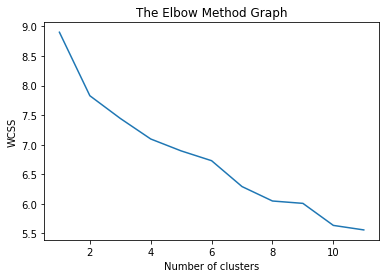

In [69]:
# 2. Plot the elbow graph
plt.plot(range(1,12),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<h4> Lets run the algorithm and print out the cluster labels </h4> <br>
By trying different scenarios while also taking in consideration the Elbow Method Graph, we have decided to go with a K of 5. let's run the k-means algorithm to segment the neighborhoods into 5 clusters.

In [90]:
# set number of clusters
kclusters = 5

# run k-means clustering
k_means1 = KMeans(n_clusters=kclusters, init ='k-means++', max_iter=300, n_init=12, random_state=5).fit(metroTO_grouped_clustering)

# check cluster labels generated for each row in the dataframe
k_means_labels = k_means1.labels_ 
k_means_labels

array([4, 0, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 2, 0, 3, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 3, 2, 2, 1, 2, 1, 2, 1, 2, 3, 1, 1, 1, 3,
       1, 4, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       4, 1, 1, 3, 3, 2, 3], dtype=int32)

In [91]:
### If k-means labels change, for ex: if you change any parameters in the kmeans algorithm. 
### use this code block instead of the following 2.
###  Un-comment this block, run it, and Skip to metroTO_merged.head(10) to display the df

#neighborhoods_venues_sorted['Cluster Labels'] = k_means_labels

# Lets also add latitude/longitude for each neighborhood by merging it with our metroTO_data dataframe. 
#metroTO_merged = neighborhoods_venues_sorted
#metroTO_merged = metroTO_merged.join(metroTO_data.set_index('Neighborhood'), on='Neighborhood')

#columns_order = [metroTO_merged.columns[1]] + [metroTO_merged.columns[0]] + list(metroTO_merged.columns[12 :]) + list(metroTO_merged.columns[2:12])
#metroTO_merged = metroTO_merged [columns_order]

<h3> Top 10 Venue Categories per Neighborhood and Cluster Team Assignation Dataframe.

Let's bring back the dataframe with the top 10 venues for each neighborhood created earlier and add in the "cluster labels".

In [72]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', k_means1.labels_)

# Lets also add latitude/longitude for each neighborhood by merging it with our metroTO_data dataframe. 
metroTO_merged = neighborhoods_venues_sorted
metroTO_merged = metroTO_merged.join(metroTO_data.set_index('Neighborhood'), on='Neighborhood')


In [73]:
# Re-arranging the columns 
columns_order = [metroTO_merged.columns[1]] + [metroTO_merged.columns[0]] + list(metroTO_merged.columns[12 :]) + list(metroTO_merged.columns[2:12])
metroTO_merged = metroTO_merged [columns_order]

In [92]:
metroTO_merged.head(10)

,Neighborhood,Cluster Labels,Postal code,Borough,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,4,M1S,Scarborough,43.794200,-79.262029,Pool Hall,Badminton Court,Breakfast Spot,Lounge,Latin American Restaurant,Not Available,Not Available,Not Available,Not Available,Not Available
1,Alderwood / Long Branch,0,M8W,Etobicoke,43.602414,-79.543484,Convenience Store,Pizza Place,Gym,Gas Station,Skating Rink,Pharmacy,Sandwich Place,Pub,Coffee Shop,Not Available
2,Bathurst Manor / Wilson Heights / Downsview North,1,M3H,North York,43.754328,-79.442259,Coffee Shop,Bank,Ice Cream Shop,Sushi Restaurant,Supermarket,Middle Eastern Restaurant,Bridal Shop,Shopping Mall,Diner,Sandwich Place
3,Bayview Village,1,M2K,North York,43.786947,-79.385975,Bank,Café,Japanese Restaurant,Grocery Store,Skating Rink,Chinese Restaurant,Not Available,Not Available,Not Available,Not Available
4,Bedford Park / Lawrence Manor East,1,M5M,North York,43.733283,-79.419750,Coffee Shop,Italian Restaurant,Restaurant,Sandwich Place,Pizza Place,Greek Restaurant,Pub,Pharmacy,Liquor Store,Butcher
5,Berczy Park,1,M5E,Downtown Toronto,43.644771,-79.373306,Coffee Shop,Hotel,Café,Restaurant,Italian Restaurant,Cocktail Bar,Japanese Restaurant,Beer Bar,Cheese Shop,Bakery
6,Birch Cliff / Cliffside West,3,M1N,Scarborough,43.692657,-79.264848,Park,Skating Rink,Café,Thai Restaurant,General Entertainment,College Stadium,Diner,Not Available,Not Available,Not Available
7,Brockton / Parkdale Village / Exhibition Place,1,M6K,West Toronto,43.636847,-79.428191,Café,Coffee Shop,Nightclub,Bar,Sandwich Place,Breakfast Spot,Supermarket,Burrito Place,Performing Arts Venue,Japanese Restaurant
8,Business reply mail Processing CentrE,1,M7Y,East Toronto,43.662744,-79.321558,Fast Food Restaurant,Light Rail Station,Harbor / Marina,Bakery,Coffee Shop,Restaurant,Burrito Place,Brewery,Farmers Market,Flea Market
9,CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport,1,M5V,Downtown Toronto,43.628947,-79.394420,Rental Car Location,Airport Service,Harbor / Marina,Boat or Ferry,Sculpture Garden,Coffee Shop,Airport Lounge,Airport Terminal,Plane,Bar


In [75]:
metroTO_merged.shape

(100, 16)

<h3> Let's visualize the Resulting Neighborhood clusters

But first, is important to make sure the are no NaN in our data. 

In [76]:
metroTO_merged.isna().sum().sum()

0

In [99]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(metroTO_merged['Latitude'], metroTO_merged['Longitude'], metroTO_merged['Neighborhood'], metroTO_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster -1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3> Let's Examine Each Cluster in More Detail </h3> <br>
Note: "Not Available" indicates that no additional venue categories were found on that particular neighborhood.
<h3>Cluster 1: </h3> 
<h4>Convenience Stores and Fast Food Joints. Residensial Areas Found on the Outskirts of the Metropolitan Area.</h4>

In [100]:
metroTO_merged.loc[metroTO_merged['Cluster Labels'] == 0, metroTO_merged.columns[[0] + list(range(6, metroTO_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Alderwood / Long Branch,Convenience Store,Pizza Place,Gym,Gas Station,Skating Rink,Pharmacy,Sandwich Place,Pub,Coffee Shop,Not Available
20,Del Ray / Mount Dennis / Keelsdale and Silverthorn,Convenience Store,Restaurant,Sandwich Place,Park,Dessert Shop,Wine Shop,Coffee Shop,Not Available,Not Available,Not Available
38,Humberlea / Emery,Discount Store,Fabric Shop,Convenience Store,Gas Station,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
70,Scarborough Village,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Pizza Place,Convenience Store,Not Available,Not Available,Not Available,Not Available,Not Available
86,West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale,Pizza Place,Theater,Convenience Store,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


<h3> Cluster 2:</h3>
<h4>Cafés, Gastro Pubs, Diverse Cusine Restaurants, Shopping and Entertainment Alongside Busy Areas of the City</h4>


In [95]:
metroTO_merged.loc[metroTO_merged['Cluster Labels'] == 1, metroTO_merged.columns[[0] + list(range(6, metroTO_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bathurst Manor / Wilson Heights / Downsview North,Coffee Shop,Bank,Ice Cream Shop,Sushi Restaurant,Supermarket,Middle Eastern Restaurant,Bridal Shop,Shopping Mall,Diner,Sandwich Place
3,Bayview Village,Bank,Café,Japanese Restaurant,Grocery Store,Skating Rink,Chinese Restaurant,Not Available,Not Available,Not Available,Not Available
4,Bedford Park / Lawrence Manor East,Coffee Shop,Italian Restaurant,Restaurant,Sandwich Place,Pizza Place,Greek Restaurant,Pub,Pharmacy,Liquor Store,Butcher
5,Berczy Park,Coffee Shop,Hotel,Café,Restaurant,Italian Restaurant,Cocktail Bar,Japanese Restaurant,Beer Bar,Cheese Shop,Bakery
7,Brockton / Parkdale Village / Exhibition Place,Café,Coffee Shop,Nightclub,Bar,Sandwich Place,Breakfast Spot,Supermarket,Burrito Place,Performing Arts Venue,Japanese Restaurant
8,Business reply mail Processing CentrE,Fast Food Restaurant,Light Rail Station,Harbor / Marina,Bakery,Coffee Shop,Restaurant,Burrito Place,Brewery,Farmers Market,Flea Market
9,CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport,Rental Car Location,Airport Service,Harbor / Marina,Boat or Ferry,Sculpture Garden,Coffee Shop,Airport Lounge,Airport Terminal,Plane,Bar
11,Cedarbrae,Coffee Shop,Bakery,Indian Restaurant,Chinese Restaurant,Athletics & Sports,Fried Chicken Joint,Gas Station,Flower Shop,Bank,Thai Restaurant
12,Central Bay Street,Coffee Shop,Café,Art Gallery,Bar,Japanese Restaurant,Ramen Restaurant,Sushi Restaurant,Chinese Restaurant,Ice Cream Shop,Middle Eastern Restaurant
14,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Diner,Restaurant,Ramen Restaurant,Mediterranean Restaurant,Yoga Studio,Burger Joint,Sandwich Place


<h3> Cluster 3:</h3> 
<h4>Typical Amenities Found Within or Surrounding Residential Areas: Coffee Shops, Grocery Shops, Gyms, Restaurants, Gas Stations, Parks </h4>

In [96]:
metroTO_merged.loc[metroTO_merged['Cluster Labels'] == 2, metroTO_merged.columns[[0] + list(range(6, metroTO_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Caledonia-Fairbanks,Park,Sporting Goods Shop,Bakery,Women's Store,Mexican Restaurant,Japanese Restaurant,Beer Store,Gym,Grocery Store,Not Available
13,Christie,Grocery Store,Café,Park,Italian Restaurant,Coffee Shop,Playground,Candy Store,Bakery,Baby Store,Diner
19,Davisville North,Park,Pizza Place,Bar,Taco Place,Sushi Restaurant,Food & Drink Shop,Ice Cream Shop,Dessert Shop,Brewery,Hotel
23,Downsview,Vietnamese Restaurant,Grocery Store,Park,Pizza Place,Gas Station,Sandwich Place,Coffee Shop,Food Court,Athletics & Sports,Fried Chicken Joint
23,Downsview,Vietnamese Restaurant,Grocery Store,Park,Pizza Place,Gas Station,Sandwich Place,Coffee Shop,Food Court,Athletics & Sports,Fried Chicken Joint
23,Downsview,Vietnamese Restaurant,Grocery Store,Park,Pizza Place,Gas Station,Sandwich Place,Coffee Shop,Food Court,Athletics & Sports,Fried Chicken Joint
23,Downsview,Vietnamese Restaurant,Grocery Store,Park,Pizza Place,Gas Station,Sandwich Place,Coffee Shop,Food Court,Athletics & Sports,Fried Chicken Joint
24,Dufferin / Dovercourt Village,Coffee Shop,Bakery,Gym,Grocery Store,Pharmacy,Park,Café,Brewery,Bank,Bar
32,Golden Mile / Clairlea / Oakridge,Diner,Bakery,Bus Line,Soccer Field,Bus Station,Ice Cream Shop,Park,Convenience Store,Coffee Shop,Not Available
33,Guildwood / Morningside / West Hill,Park,Fast Food Restaurant,Mexican Restaurant,Fried Chicken Joint,Thrift / Vintage Store,Moving Target,Restaurant,Rental Car Location,Beer Store,Bank


<h3>Cluster 4:</h3> 
<h4>Parks, Fields, Trails, Sports & Recreation    

In [97]:
metroTO_merged.loc[metroTO_merged['Cluster Labels'] == 3, metroTO_merged.columns[[0] + list(range(6, metroTO_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Birch Cliff / Cliffside West,Park,Skating Rink,Café,Thai Restaurant,General Entertainment,College Stadium,Diner,Not Available,Not Available,Not Available
29,Forest Hill North & West,Park,Jewelry Store,Bus Line,Gym / Fitness Center,Sushi Restaurant,Trail,Not Available,Not Available,Not Available,Not Available
39,Humewood-Cedarvale,Field,Hockey Arena,Trail,Park,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
52,Moore Park / Summerhill East,Park,Thai Restaurant,Tennis Court,Playground,Gym,Grocery Store,Not Available,Not Available,Not Available,Not Available
61,Parkwoods,Park,Food & Drink Shop,Burger Joint,Construction & Landscaping,Pet Store,Not Available,Not Available,Not Available,Not Available,Not Available
65,Rosedale,Park,Playground,Trail,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
91,Willowdale / Newtonbrook,Coffee Shop,Bus Line,Trail,Park,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
92,Woburn,Coffee Shop,Park,Business Service,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
94,York Mills West,Park,Tennis Court,Bank,Convenience Store,Pet Store,Not Available,Not Available,Not Available,Not Available,Not Available


<h3> Cluster 5:</h3> 
<h4>Breakfast Spots and Fast Food Joints. Mixture of Commercial and Residential Areas Found on the Outskirts of the Metropolitan Area.</h4>

In [98]:
metroTO_merged.loc[metroTO_merged['Cluster Labels'] == 4, metroTO_merged.columns[[0] + list(range(6, metroTO_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Pool Hall,Badminton Court,Breakfast Spot,Lounge,Latin American Restaurant,Not Available,Not Available,Not Available,Not Available,Not Available
67,Rouge Hill / Port Union / Highland Creek,Breakfast Spot,Burger Joint,Bar,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
88,Weston,Breakfast Spot,Fried Chicken Joint,Convenience Store,Pharmacy,Diner,Not Available,Not Available,Not Available,Not Available,Not Available


****